In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('X_train.csv')
df_test = pd.read_csv('X_test.csv')
print(df_train.columns)

Index(['Unnamed: 0', 'designation', 'description', 'productid', 'imageid'], dtype='object')


Train set:
Unnamed: 0      0.000000
designation     0.000000
description    35.093504
productid       0.000000
imageid         0.000000
dtype: float64

Test set:
Unnamed: 0      0.000000
designation     0.000000
description    35.375036
productid       0.000000
imageid         0.000000
dtype: float64


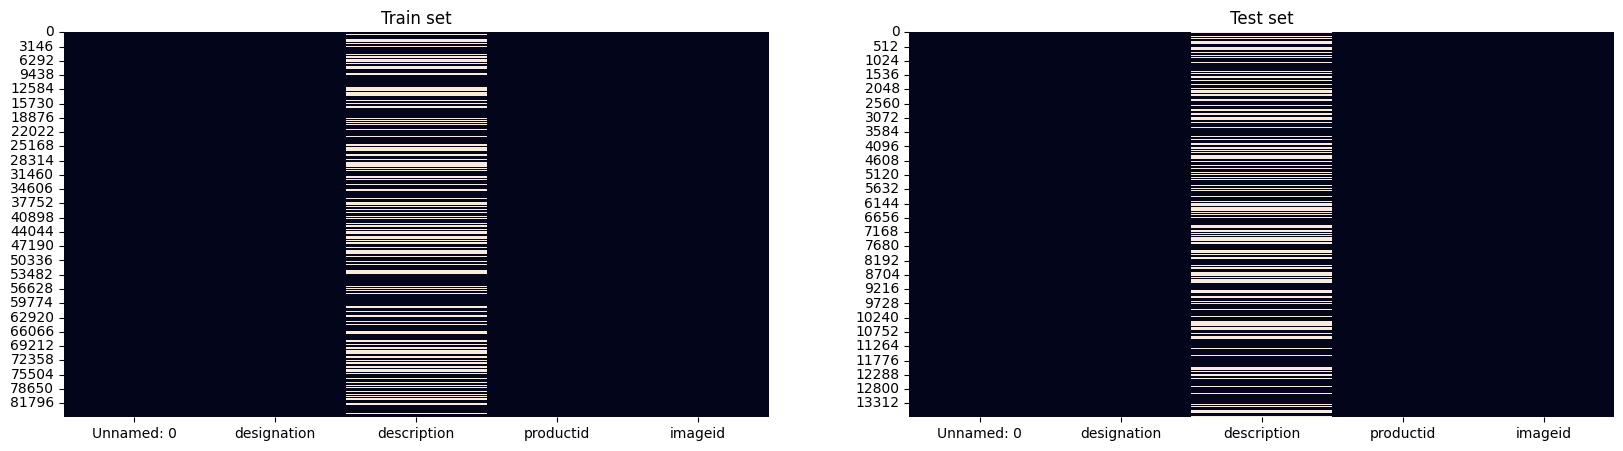

In [16]:
# show number of empty row per column as a percentage for train and test
print("Train set:")
print(df_train.isnull().sum() / len(df_train) * 100)
print("\nTest set:")
print(df_test.isnull().sum() / len(df_test) * 100)

# show graph number of empty row per column as a percentage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

sns.heatmap(df_train.isnull(), cbar=False, ax=ax1)
ax1.set_title('Train set')

sns.heatmap(df_test.isnull(), cbar=False, ax=ax2) 
ax2.set_title('Test set')

plt.show()

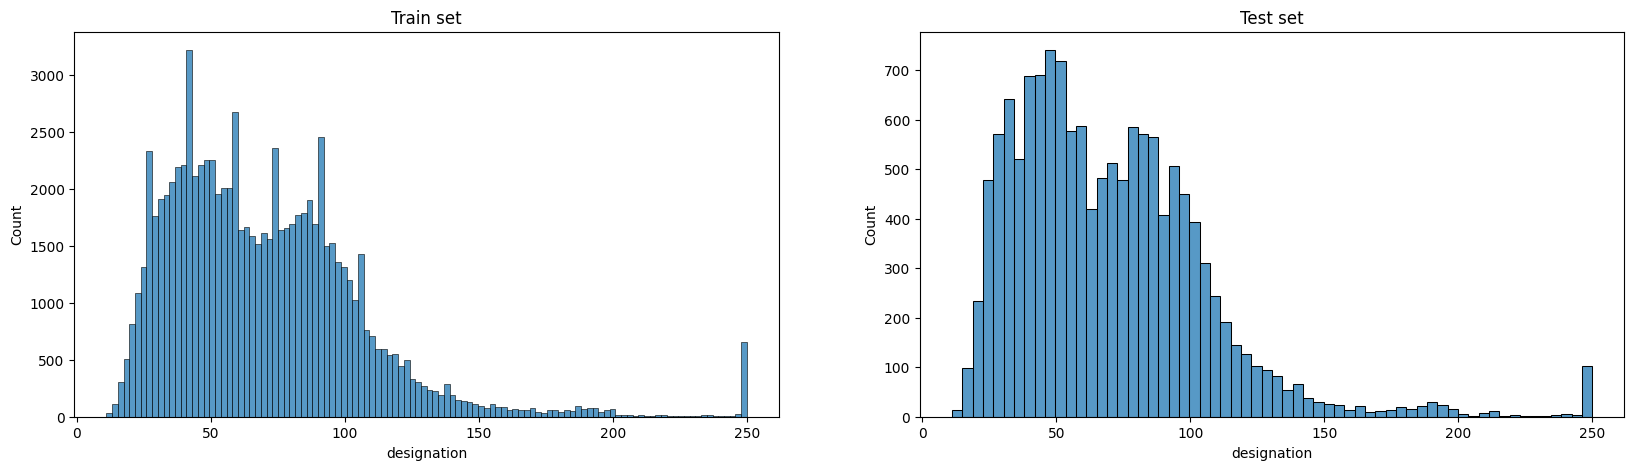

In [17]:



# show distribution of Title lengths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(df_train['designation'].apply(lambda x: len(x)), ax=ax1)
ax1.set_title('Train set')

sns.histplot(df_test['designation'].apply(lambda x: len(x)), ax=ax2)
ax2.set_title('Test set')

plt.show()

We see that most texts have a length between 10 and 120 characters. Also we see a spike at 250 indicating that there might be a limit on rakuten at 250 characters.

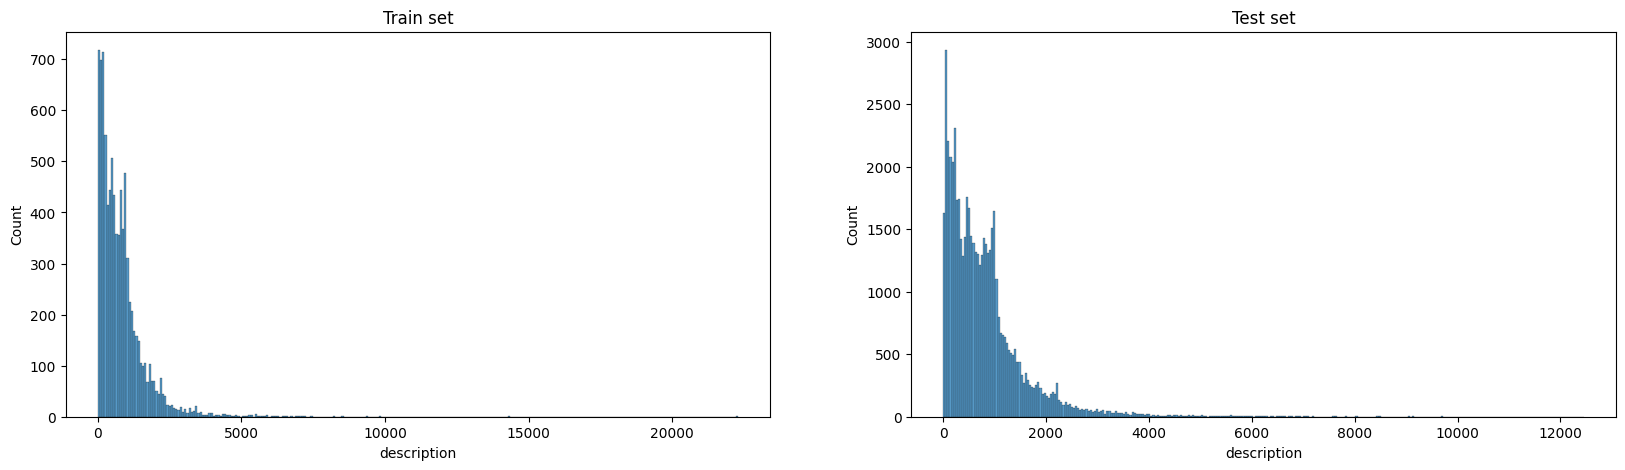

In [18]:
# show distribution of Description lengths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# remove rows with empty description
df_temp_test = df_train.dropna(subset=['description'])
df_temp_train = df_test.dropna(subset=['description'])

sns.histplot(df_temp_train['description'].apply(lambda x: len(str(x)) if pd.notna(x) else 0), ax=ax1)
ax1.set_title('Train set')

sns.histplot(df_temp_test['description'].apply(lambda x: len(str(x)) if pd.notna(x) else 0), ax=ax2)
ax2.set_title('Test set')

plt.show()

In [20]:
# show how many rows have a description longer that 10k characters
print("Train set:")
print(len(df_temp_train[df_temp_train['description'].apply(lambda x: len(str(x)) if pd.notna(x) else 0) > 5000]))


Train set:
47
